# <h1 align="center"><font color="red">Real Estate Price Prediction</font></h1>

<font color="yellow">Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

Links de estudo:

* [Real Estate Price Prediction using Python](https://thecleverprogrammer.com/2023/12/11/real-estate-price-prediction-using-python/)

* [Build An End-to-End Machine Learning Model](https://thecleverprogrammer.com/2023/12/18/build-an-end-to-end-machine-learning-model/)

In [1]:
# Importando as nossas Bibliotecas:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
# Use essa flag caso esteja utilizando o jupyter notebook ou o console ipython:
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


In [2]:
# Carregando nossos Dados:
real_estate_data =pd. read_csv("./Real_Estate.csv")

real_estate_data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [3]:
real_estate_data.shape

(414, 7)

In [4]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


<font color="orange">Temos 7 colunas e cada coluna tem a seguinte descrição:</font>

* Data da transação (`Transaction date`): A data da transação imobiliária.

* Idade da casa (`House age`): Idade da casa em anos.

* Distância até a estação MRT mais próxima (`Distance to the nearest MRT station`): Distância até a estação Mass Rapid Transit mais próxima em metros.

* Número de lojas de conveniência (`Number of convenience stores`): Número de lojas de conveniência nas proximidades.

* Latitude (`Latitude`): Latitude da localização do imóvel.

* Longitude (`Longitude`): Longitude da localização do imóvel.

* Preço da casa por unidade de área (`House price of unit area`): Preço da casa por unidade de área.

In [5]:
# Ver os valores Missing:
real_estate_data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [6]:
real_estate_data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


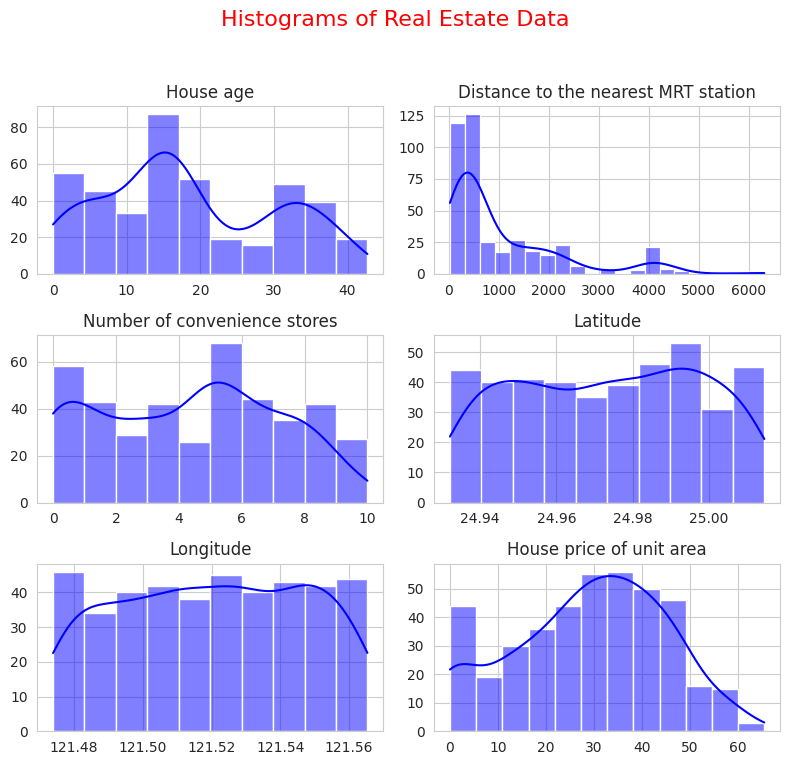

In [7]:
# Definimos o estilo estético das parcelas:
sns.set_style("whitegrid")

# Crie histogramas para as colunas numéricas:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
fig.suptitle('Histograms of Real Estate Data', fontsize=16, color="red")

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], kde=True, ax=axes[i//2, i%2], color="blue")
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


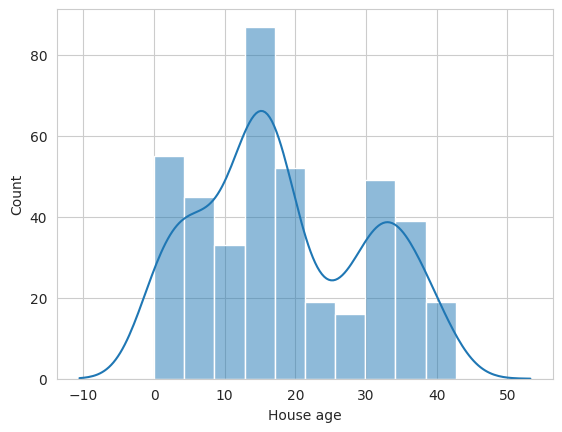

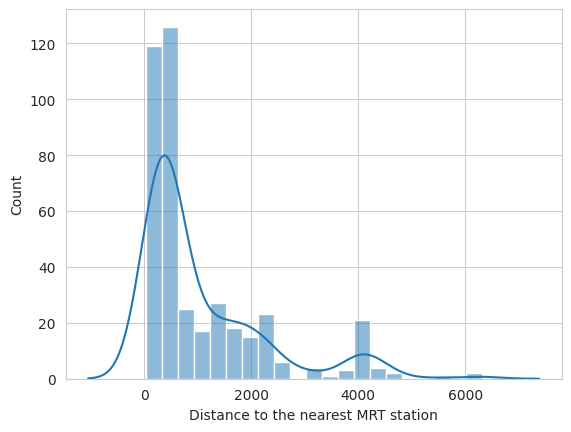

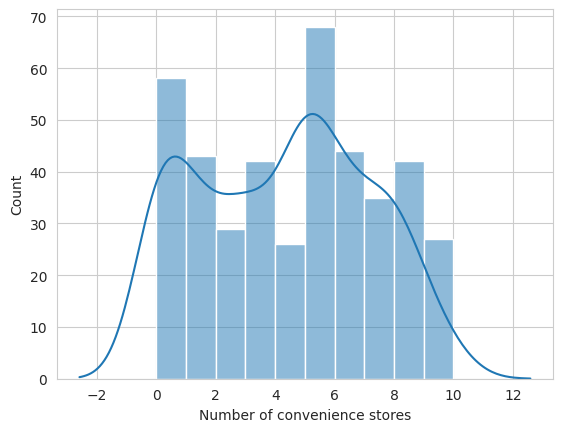

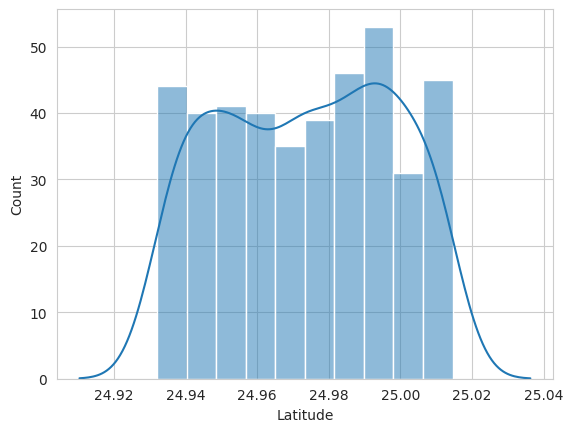

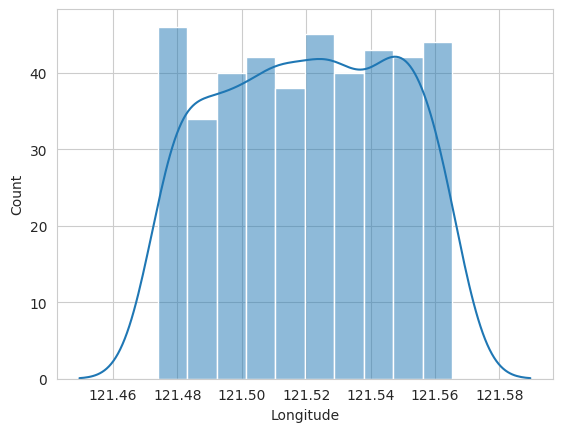

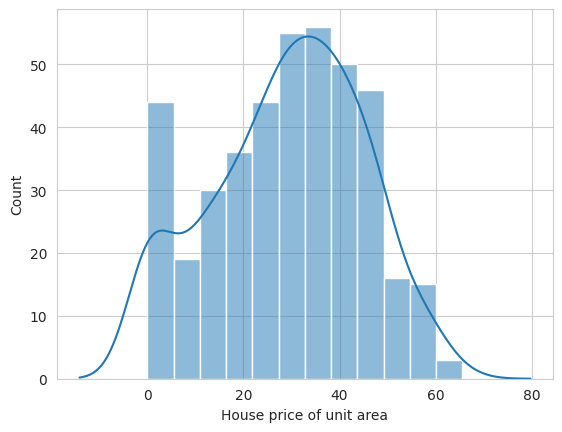

In [14]:
columns = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']
for i in columns:
    plt.figure()
    plt.grid(True)
    sns.histplot(real_estate_data[i], kde=True, kde_kws=dict(cut=3))
    #sns.rugplot(real_estate_data[i])


Os histogramas fornecem informações sobre a distribuição de cada variável:

* Idade das Casas (<font color="yellow">House Age</font>): Mostra uma distribuição relativamente uniforme com um ligeiro aumento no número de propriedades mais novas (menor idade).

* Distância até a estação MRT mais próxima (<font color="yellow">Distance to the Nearest MRT Station</font>): a maioria das propriedades está localizada perto de uma estação MRT, conforme indicado pela alta frequência de distâncias mais baixas. Há uma longa cauda que se estende em direção a distâncias maiores, sugerindo que algumas propriedades estão bem longe das estações MRT.

* Número de lojas de conveniência (<font color="yellow">Number of Convenience Stores</font>): exibe uma ampla variedade, com picos notáveis ​​em contagens específicas, como 0, 5 e 10. Sugere certas configurações comuns em termos de disponibilidade de lojas de conveniência.

* Latitude e Longitude (<font color="yellow">Latitude and Longitude</font>): Ambas apresentam distribuições relativamente concentradas, indicando que as propriedades estão localizadas em uma área geograficamente limitada.

* Preço da casa da área unitária (<font color="yellow">House Price of Unit Area</font>): exibe uma distribuição assimétrica à direita, com concentração de propriedades na faixa de preço mais baixa e menos propriedades à medida que os preços aumentam.